In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime


%matplotlib inline

In [6]:
df = pd.read_excel('nsrdb_data.xlsx')
df.head()

,Year,Month,Day,Hour,Minute,DHI,Clearsky DNI,GHI,Solar Zenith Angle,Clearsky GHI,Temperature,DNI,Ozone,Clearsky DHI,Cloud Type
0,2022,1,1,0,0,0,0,0,92.68,0,-10.9,0,0.271,0,8
1,2022,1,1,0,30,0,0,0,97.90,0,-11.7,0,0.271,0,8
2,2022,1,1,1,0,0,0,0,103.29,0,-12.6,0,0.271,0,7
3,2022,1,1,1,30,0,0,0,108.83,0,-13.3,0,0.271,0,7
4,2022,1,1,2,0,0,0,0,114.48,0,-14.1,0,0.271,0,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                17520 non-null  int64  
 1   Month               17520 non-null  int64  
 2   Day                 17520 non-null  int64  
 3   Hour                17520 non-null  int64  
 4   Minute              17520 non-null  int64  
 5   DHI                 17520 non-null  int64  
 6   Clearsky DNI        17520 non-null  int64  
 7   GHI                 17520 non-null  int64  
 8   Solar Zenith Angle  17520 non-null  float64
 9   Clearsky GHI        17520 non-null  int64  
 10  Temperature         17520 non-null  float64
 11  DNI                 17520 non-null  int64  
 12  Ozone               17520 non-null  float64
 13  Clearsky DHI        17520 non-null  int64  
 14  Cloud Type          17520 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 2.0 MB


In [8]:
df[['DHI', 'DNI', 'GHI', 'Solar Zenith Angle', 'Temperature']].describe()

,DHI,DNI,GHI,Solar Zenith Angle,Temperature
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,67.694920,266.664441,209.842922,89.674937,0.222683
std,115.778411,393.747299,294.856481,36.428796,11.191359
min,0.000000,0.000000,0.000000,16.010000,-27.700000
25%,0.000000,0.000000,0.000000,61.107500,-8.800000
50%,0.000000,0.000000,0.000000,89.325000,-0.800000
75%,72.000000,572.000000,404.000000,118.222500,8.600000
max,773.000000,1129.000000,1114.000000,164.020000,27.000000


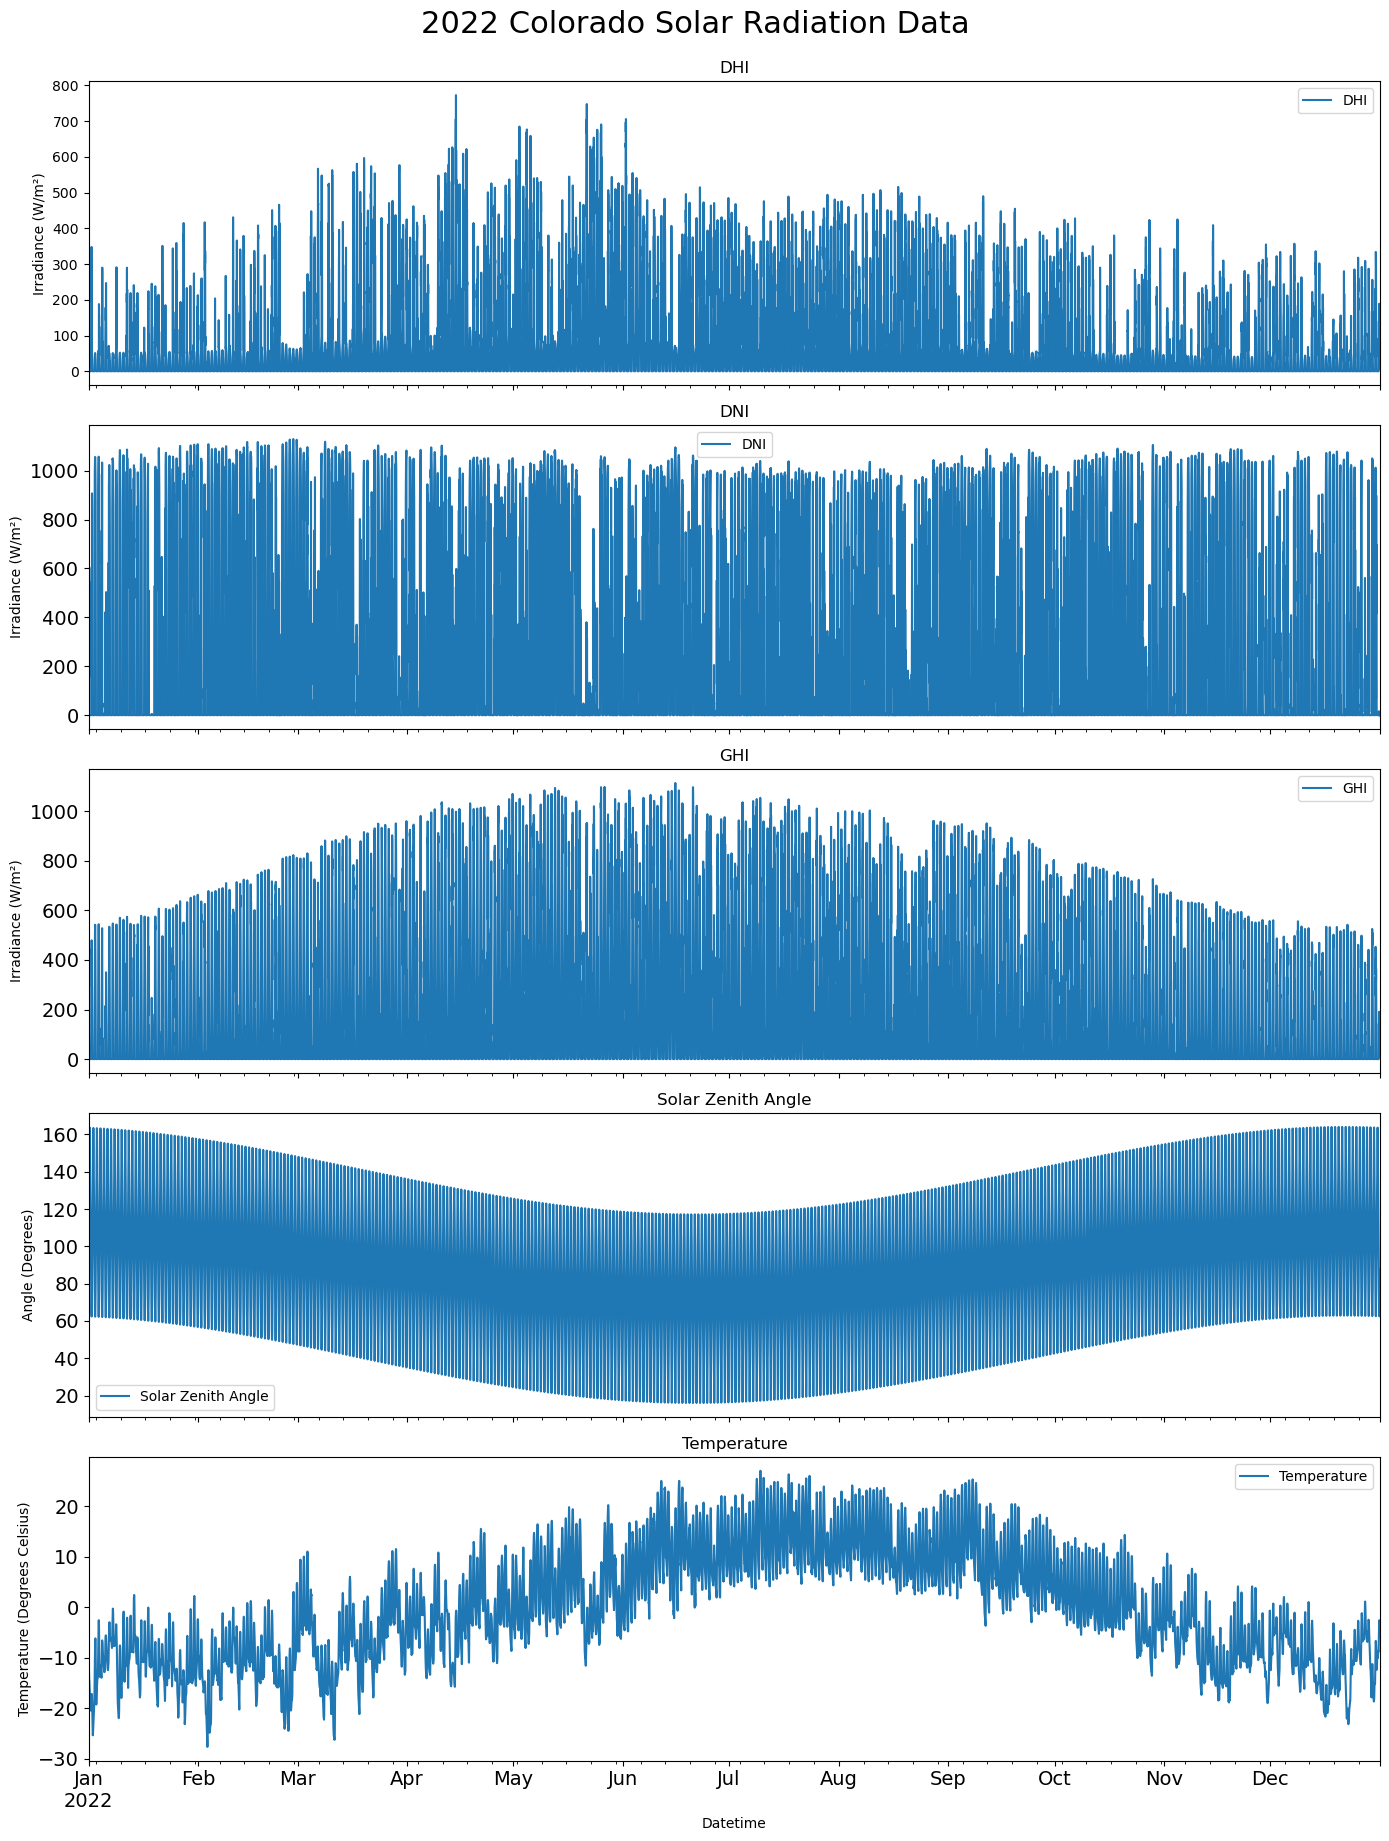

In [9]:
# Convert the Year, Month, Day, Hour, Minute columns into a datetime column
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Set Datetime as the index
df.set_index('Datetime', inplace=True)

# Plotting
fig, axes = plt.subplots(5, 1, figsize=(14, 18), sharex=True)

# DHI and Clearsky DHI
df['DHI'].plot(kind='line', ax=axes[0], title='DHI', legend=True)
axes[0].set_ylabel('Irradiance (W/m²)')
axes[0].set_xlabel('Datetime')

# DNI and Clearsky DNI
df['DNI'].plot(kind='line', ax=axes[1], title='DNI', legend=True, fontsize=14)
axes[1].set_ylabel('Irradiance (W/m²)')
axes[1].set_xlabel('Datetime')

# GHI and Clearsky GHI
df['GHI'].plot(kind='line', ax=axes[2], title='GHI', legend=True, fontsize=14)
axes[2].set_ylabel('Irradiance (W/m²)')
axes[2].set_xlabel('Datetime')

#Solar Zenith Angle (this is important for Direnct Normal Irradiance)
df['Solar Zenith Angle'].plot(kind='line', ax=axes[3], title='Solar Zenith Angle', legend=True, fontsize=14)
axes[3].set_ylabel('Angle (Degrees)')
axes[3].set_xlabel('Datetime')

#Temperature 
df['Temperature'].plot(kind='line', ax=axes[4], title='Temperature', legend=True, fontsize=14)
axes[4].set_ylabel('Temperature (Degrees Celsius)')
axes[4].set_xlabel('Datetime')

plt.tight_layout()
plt.suptitle('2022 Colorado Solar Radiation Data', y=1.02, fontsize=22)
plt.show()
fig.savefig('irradiance_visualization.png')